In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

In [2]:
#  ****************  DATA CLEANIING *******************

In [3]:
poll = pd.read_excel(r'COMPLETE 'POLL.XLSX' FILE PATH')

In [4]:
# Deleting 'test' row to avoid bias

poll.drop(poll.loc[poll['_ID de respuesta']==94016543].index, inplace=True)

In [5]:
# Deleting unusefull columns

poll = poll.drop(['Start','Resume-Code','Fecha y hora', 'Estado de la participación',
           '6. 6. ESTIMATIONS about YOUR EXISTING MEDICINES ESTIMACIONES sobre LAS MEDICINAS QUE POSEE',
            '7. 7. What kind of medicine you have at home? Que tipo de medicinas tienes en tu hogar?',
            '8. 8. Have you ever found unnecessary (not longer needed) or expired medicine at home? If YES, please mark which kind of medicine you found (if NO just skip this question) Has encontrado alguna vez medicina que ya no necesitas o vencida (fecha expiración excedida)? Si la respuesta es SI, por favor indica que tipo de medicinas eran (caso contrario evita esta pregunta).',
          '9. 9. What would you say if..... Que dirias sobre.....'],axis=1)

In [6]:
# Renaming usefull columns

poll.rename(columns = {'_ID de respuesta':'ID', 'Estado de la participación':'Full Poll?',
                      '1. 1. Gender (Genero)':'Male?','2. 2. Age range (Rango de edad​)':'Age',
                       '3. 3. How many people live with you? (Cuantas personas viven contigo?)':'Home population',
                      '4. 4. Where do you live? (Donde vives?)':'Country',
                      '5. 5. How many different medicines do you have at home? (average) Cuantos medicamentos distintos tienes en tu hogar? (promedio)':'Qty medic.',
                      'A). From your existing medicines, what % is being used at least every 1 months? (Que % de medicinas, sobre el total, son usadas cada 1 mes al menos?)':'% med used 1 month',
                      'B). From your existing medicines, what % is being used at least every 6 months? (Que % de medicinas, sobre el total, son usadas cada 6 meses al menos?)':'% med used 6 month',
                      'C). From your existing medicines, what % is being used at least every 12 months? (Que % de medicinas, sobre el total, son usadas cada 12 meses al menos?)':'% med used 12 month',
                      'D). From your existing medicines, what % you think would be unnecessary or expired already? (Que % de tus medicinas cree ya estan vencidas o serian innecesarias?)':'% med expire unusefull',
                      'Heart disease (Enfermedades cardiacas)':'have heart',
                       'Mental or stress diseases, ex.alzheimer, etc (Enfermedades mentales o nerviosas, ej.alzheimer, etc)':'have mental',
                      'Breathing disease (Enfermedades respiratorias)':'have breathing','Blood pressure (Presión arterial)':'have pressure',
                      'Cancer, leucemia or similar (Cancer, leucemia o similar)':'have cancer',
                       'General disease, ex. flu, fever, headache (Enfermedades generales, ej.fiebre, dolor de cabeza, gripe)':'have general',
                      'Dental (Tratamiento dental)':'have dental','Alergies treatment (Tratamiento alergias)':'have alergies',
                      'Campo de texto':'have comments', 'Heart disease - Enfermedades cardiacas':'extra heart',
                      'Mental or stress diseases (alzheimer, etc) - Enfermedades mentales o nerviosas (alzheimer, etc)':'extra mental',
                      'Breathing disease - Enfermedades respiratorias':'extra breath','Blood pressure - Presión arterial':'extra pressure',
                      'Cancer, leucemia or similar - Cancer, leucemia o similar':'extra cancer','Colesterol, diabetes.1':'extra diabetes colesterol',
                      'Common (flu, fever, headache) - Generales (fiebre, dolor de cabeza, gripe)':'extra general',
                      'Dental - Tratamiento dental':'extra dental','Alergies treatment - Tratamiento alergias':'extra alergie',
                      'Campo de texto.1':'extra comment'}, inplace = True)

poll.columns = poll.columns.str.replace('\"','')
poll.columns = poll.columns.str.replace("\'",'')

poll.rename(columns = {'A). You were asked to donate this unnecessary or extra medicines for those who cant afford it? (Estarías de acuerdo en donar aquellas medicinas que no uses ni necesites a aquellos que no pudieran pagarlas?)':'will donate?',
                       'B). You were asked to leave donate medicines at a checkpoint near you (max.5KM)? (Aceptarias entregar las medicinas para donar en un lugar especifico cerca de ti -5KM max.-?)':'will deliver?',
                      'C). Based on your estimation, will you confirm that most of your medicines are pills (rather than liquids)? (Basado en su estimacion, confirmarias que la mayoria de tus medicamentos son pastillas/pildoras (en lugar de liquido)?':'most pilds?',
                      '10. Leave any suggestion or comment below. If you would like to receive a copy of this polls feedback leave your email address. Puede completar cualquier comentario o sugerencia debajo. Si desea recibir una copia de las respuestas a este formulario, complete su direccion de email.':'comment'}, inplace = True)


In [7]:
# Cleaning wrong date - data columns

poll['Home population'] = poll['Home population'].astype(str)
poll['Home population'] = poll['Home population'].replace(['2022-04-02 00:00:00','2022-06-05 00:00:00'],['2 - 4','5 - 6'])

poll['Qty medic.'] = poll['Qty medic.'].astype(str)
poll['Qty medic.'] = poll['Qty medic.'].replace(['2022-07-04 00:00:00','2022-11-08 00:00:00','2015-12-01 00:00:00'],
                                                ['4 - 7','8 - 11','12 - 15'])

In [8]:
# Value Standarization (0-1)

poll['Male?'].replace(['Male (Masculino)','Female (Femenino)'], ['Male','Female'], inplace=True)
poll['will donate?'].replace([2],[0], inplace=True)
poll['will deliver?'].replace([2],[0], inplace=True)
poll['most pilds?'].replace([2],[0], inplace=True)

poll['Country'].replace(['España'], ['Spain'], inplace=True)
poll['Country'].replace(['Estados Unidos'], ['USA'], inplace=True)
poll['Country'].replace(['United States of America'], ['USA'], inplace=True)

poll['Qty medic.'].replace(['3 or less (3 o menos)'], ['0 - 3'], inplace=True)
poll['Qty medic.'].replace(['36 or more (36 o mas)'], ['36 <'], inplace=True)

poll['% med used 1 month'].replace([1,2,3,4,5], ['0-20%','21-40%','41-60%','61-80%','81-100%'], inplace=True)
poll['% med used 6 month'].replace([1,2,3,4,5], ['0-20%','21-40%','41-60%','61-80%','81-100%'], inplace=True)
poll['% med used 12 month'].replace([1,2,3,4,5], ['0-20%','21-40%','41-60%','61-80%','81-100%'], inplace=True)
poll['% med expire unusefull'].replace([1,2,3,4,5], ['0-20%','21-40%','41-60%','61-80%','81-100%'], inplace=True)

poll['will donate?'].replace([1,0], ['YES','NO'], inplace=True)
poll['will deliver?'].replace([1,0], ['YES','NO'], inplace=True)
poll['most pilds?'].replace([1,0], ['YES','NO'], inplace=True)

In [9]:
# Replacing NaN values with empty

poll = poll.fillna(0)

In [10]:
poll

,ID,Male?,Age,Home population,Country,Qty medic.,% med used 1 month,% med used 6 month,% med used 12 month,% med expire unusefull,have heart,have mental,have breathing,have pressure,have cancer,"Colesterol, diabetes",have general,have dental,have alergies,have comments,extra heart,extra mental,extra breath,extra pressure,extra cancer,extra diabetes colesterol,extra general,extra dental,extra alergie,extra comment,will donate?,will deliver?,most pilds?,comment
0,94016141,Male,21 - 35,0 - 1,Portugal,21 - 27,0-20%,41-60%,41-60%,41-60%,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,YES,YES,YES,0
1,94016315,Female,76 - 85,0 - 1,Argentina,4 - 7,81-100%,81-100%,81-100%,0-20%,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,YES,YES,YES,0
2,94016388,Female,21 - 35,0 - 1,Francia,4 - 7,41-60%,0-20%,0-20%,21-40%,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,YES,YES,YES,0
3,94016392,Male,36 - 50,2 - 4,Spain,8 - 11,21-40%,41-60%,0-20%,0-20%,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,"Nerve painful treatment, children vitamins",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,YES,YES,YES,roque.ourense@gmail.com
4,94016414,Male,36 - 50,0 - 1,Austria,12 - 15,0-20%,21-40%,0-20%,41-60%,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,YES,NO,YES,0
5,94016435,Female,36 - 50,0 - 1,Argentina,4 - 7,0-20%,21-40%,21-40%,81-100%,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,YES,YES,YES,0
6,94016503,Female,66 - 75,0 - 1,Argentina,8 - 11,21-40%,41-60%,41-60%,0-20%,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,YES,YES,YES,No se menciona antibióticos en la lista de med...
7,94016519,Female,66 - 75,0 - 1,Argentina,8 - 11,61-80%,0-20%,0-20%,0-20%,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Para el estómago,YES,YES,YES,gramergarcia@hotmail.com
8,94016527,Female,51 - 65,2 - 4,USA,0 - 3,81-100%,0-20%,0-20%,0-20%,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,YES,YES,YES,0
10,94016550,Male,36 - 50,2 - 4,Spain,0 - 3,41-60%,61-80%,81-100%,21-40%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,YES,YES,YES,0


<AxesSubplot:>

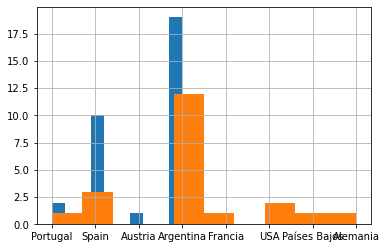

In [11]:
# poll['Country'].hist()
(poll[poll['Male?']=='Male']['Country']).hist()
(poll[poll['Male?']=='Female']['Country']).hist()

<AxesSubplot:>

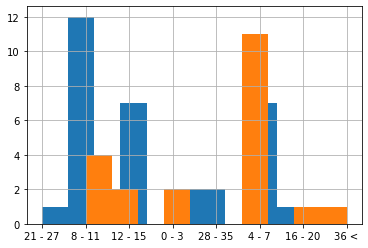

In [12]:
(poll[poll['Male?']=='Male']['Qty medic.']).hist()
(poll[poll['Male?']=='Female']['Qty medic.']).hist()

<AxesSubplot:>

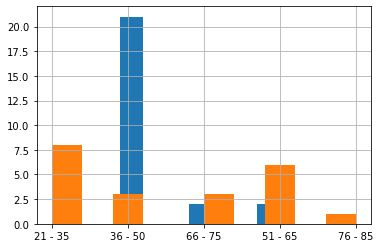

In [13]:
(poll[poll['Male?']=='Male']['Age']).hist()
(poll[poll['Male?']=='Female']['Age']).hist()

In [14]:
poll.to_excel('clean_poll.xlsx')